<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231ALK_213BTMRVP_R6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## Get Data

In [294]:
data_origin = pd.read_csv('https://raw.githubusercontent.com/hoonzi-s/APC/main/%231%20ALK%20RVP%20CSV.csv', index_col = 0)
# data_origin.info()
# data_origin.describe()
data_origin.columns = ['RVP', 'T', 'P', 'F', 'R']
data = data_origin[(data_origin.iloc[:, 0] < 70) & (data_origin.iloc[:, 1] > 120)]
data['RF'] = data['R'] / data['F']
data = data[data['RF'] >= 0.2]
x = data[['T', 'P', 'F', 'RF']]
y = data['RVP']

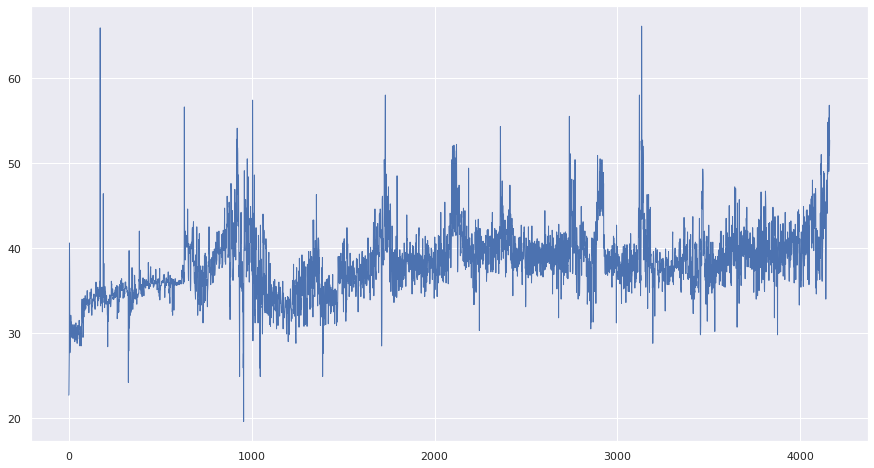

In [295]:
plt.figure(figsize = (15, 8))
plt.plot(np.arange(len(y)), data.RVP, lw = 1)
plt.show()

# LinearRegression

In [296]:
pf = PolynomialFeatures()
pf.fit(x)
x_poly = pf.transform(x)

sc = StandardScaler()
sc.fit(x_poly)
x_scaled = sc.transform(x_poly)

x_train, x_test, y_train, y_test = tts(x_scaled, y)

model = LinearRegression()
model.fit(x_train, y_train)
inf = model.predict(x_scaled)

print(f'train R2: {model.score(x_train, y_train)}')
print(f'test R2: {model.score(x_test, y_test)}')
print(f'total R2: {model.score(x_scaled, y)}')
print(f'MAE: {MAE(y, inf)}')
print(f'MSE: {MSE(y, inf)}')
print(model.coef_, model.intercept_)

train R2: 0.6648245338181763
test R2: 0.6088602990524093
total R2: 0.6520163812026707
MAE: 1.6081339729779425
MSE: 5.254973759803577
[  0.         -23.78617109  26.19086491   4.89968445   8.86649698
  29.50315402 -25.1835271   -7.29520223  -4.95760315  -4.66334491
   2.27766637  -0.14078924   0.76002327  -0.72705266  -2.66804655] 38.274966730069394


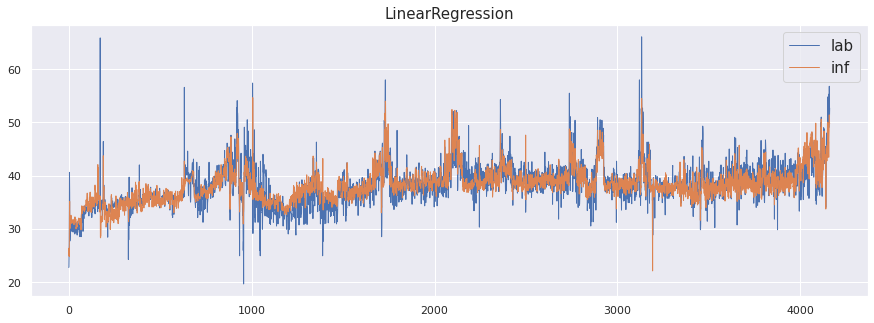

In [298]:
plt.figure(figsize = (15, 5))
plt.plot(np.arange(len(y)), y, lw = 1, label = 'lab')
plt.plot(np.arange(len(y)), inf, lw = 1, label = 'inf')
plt.title('LinearRegression', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [316]:
for i in range(10):
  x_train, x_test, y_train, y_test = tts(x, y)

  model = LinearRegression()
  model.fit(x_train, y_train)
  inf = model.predict(x)
  # print(f'train R2: {model.score(x_train, y_train)}')
  # print(f'test R2: {model.score(x_test, y_test)}')
  # print(f'total R2: {model.score(x, y)}')
  # print(f'MAE: {MAE(y, inf)}')
  # print(f'MSE: {MSE(y, inf)}')
  print(model.coef_, model.intercept_)

[-0.89655898  0.10009716 -0.00900618  8.10911941] 123.9959745412426
[-0.90532942  0.10180517 -0.01557101  6.85729774] 125.56954335804042
[-0.87087597  0.09613087 -0.01098145  6.8304217 ] 122.44811360596334
[-8.72622830e-01  9.57329630e-02 -2.58667867e-03  8.62186625e+00] 121.5166079207047
[-0.89560097  0.09963358 -0.01537261  6.65218592] 125.05462981695547
[-0.87358388  0.09635745 -0.00988933  7.6582869 ] 122.36625563290059
[-0.88974027  0.09923859 -0.01782749  7.01098381] 124.51786452657194
[-0.87591352  0.09625479 -0.01574854  6.3887995 ] 123.68414225686772
[-0.89082608  0.09980045 -0.01211975  7.73766693] 123.70879434936917
[-0.88269044  0.09789071 -0.01913011  5.57461559] 124.53166282195403


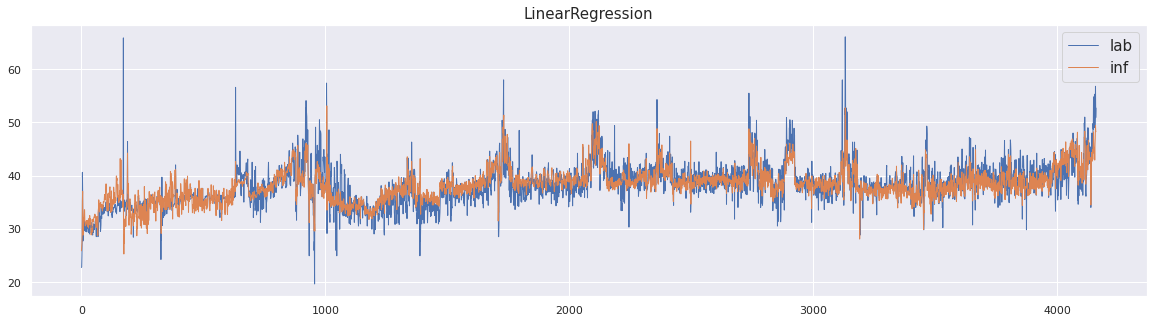

In [317]:
plt.figure(figsize = (20, 5))
plt.plot(np.arange(len(y)), y, lw = 1, label = 'lab')
plt.plot(np.arange(len(y)), inf, lw = 1, label = 'inf')
plt.title('LinearRegression', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Lasso

alpha: 0.001, zeros: 0.0
train R2: 0.6331063080723547
test R2: 0.630532164529704
total R2: 0.6326395867519473
MAE: 1.6650476712639257
MSE: 5.547586805037075
[-0.89865287  0.10037839 -0.01696403  5.89949475] 125.57654683648104

alpha: 0.003, zeros: 0.0
train R2: 0.6334618065869154
test R2: 0.6258121605922249
total R2: 0.631787473055162
MAE: 1.666838277160636
MSE: 5.5604547530527055
[-0.89935093  0.09958774 -0.02676754  2.5833927 ] 127.83514996756018

alpha: 0.010, zeros: 1.0
train R2: 0.6251183787492078
test R2: 0.6426508827970909
total R2: 0.6300305961558542
MAE: 1.6711070131797694
MSE: 5.586985720334949
[-0.8950916   0.09933205 -0.04230116  0.        ] 129.50559894364412

alpha: 0.032, zeros: 1.0
train R2: 0.6312730320351317
test R2: 0.6267084563205401
total R2: 0.6301007663719627
MAE: 1.6709900141406273
MSE: 5.585926065154501
[-0.86743184  0.09488308 -0.03598534  0.        ] 126.72122824738673

alpha: 0.100, zeros: 1.0
train R2: 0.630262861033161
test R2: 0.6299906793765839
total R2:

alpha: 3.162, zeros: 2.0
train R2: 0.545191460611791
test R2: 0.560378771689287
total R2: 0.5491691264637876
MAE: 1.8639552541332285
MSE: 6.8080917680263635
[-0.54634737  0.0518917  -0.          0.        ] 94.77956767708602



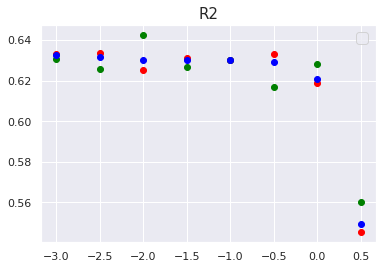

In [323]:
# plt.figure(figsize = (10, 5))
alphas = [10 ** a for a in np.arange(-3, 1, 0.5)]

for alpha in alphas:
  
  train_r2 = []
  test_r2 = []
  total_r2 = []
  zeros = []
  mae = []
  mse = []

  for n in range(10):
    pf = PolynomialFeatures()
    pf.fit(x)
    x_poly = pf.transform(x)

    sc = StandardScaler()
    sc.fit(x_poly)
    x_scaled = sc.transform(x_poly)

    x_train, x_test, y_train, y_test = tts(x, y)

    model = Lasso(alpha = alpha, max_iter = 1e7)
    model.fit(x_train, y_train)
    inf = model.predict(x)

    train_r2.append(model.score(x_train, y_train))
    test_r2.append(model.score(x_test, y_test))
    total_r2.append(model.score(x, y))
    zeros.append(np.sum(model.coef_==0))
    mae.append(MAE(y, inf))
    mse.append(MSE(y, inf))

  print(f'alpha: {alpha:.3f}, zeros: {np.mean(zeros)}')
  print(f'train R2: {np.mean(train_r2)}')
  print(f'test R2: {np.mean(test_r2)}')
  print(f'total R2: {np.mean(total_r2)}')
  print(f'MAE: {np.mean(mae)}')
  print(f'MSE: {np.mean(mse)}')
  print(model.coef_, model.intercept_)
  print()

  plt.scatter(np.log10(alpha), np.mean(train_r2), c = 'red')
  plt.scatter(np.log10(alpha), np.mean(test_r2), c = 'green')
  plt.scatter(np.log10(alpha), np.mean(total_r2), c = 'blue')
plt.title('R2', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [328]:
for i in range(10):
  x_train, x_test, y_train, y_test = tts(x, y)

  model = Lasso(alpha = 0.01, max_iter = 1e8)
  model.fit(x_train, y_train)
  inf = model.predict(x)
  print(model.score(x, y), model.coef_, model.intercept_)

0.6300582966438728 [-0.88349514  0.09881608 -0.04301234  0.        ] 128.17927921120642
0.6300635424336563 [-0.8862106   0.09752718 -0.0420554   0.        ] 128.91203005062246
0.6299553191934958 [-0.87574742  0.09736904 -0.03554049  0.        ] 126.96933591759515
0.6302334676467465 [-0.89484115  0.09942444 -0.04024666  0.        ] 129.27067965875986
0.6295896247416146 [-0.8634534   0.09553682 -0.04097071  0.        ] 126.36419339687026
0.6301903920895647 [-0.89301173  0.09938962 -0.03953272  0.        ] 128.98639986834587
0.630186829710103 [-0.88200648  0.09785253 -0.03973002  0.        ] 127.99567196407688
0.6299568555808235 [-0.87918412  0.09760253 -0.04444201  0.        ] 128.1123858781724
0.630220603468146 [-0.89643163  0.09961699 -0.0413817   0.        ] 129.51660312771065
0.6301529615101076 [-0.89459956  0.09989982 -0.04014054  0.        ] 129.0776552056904


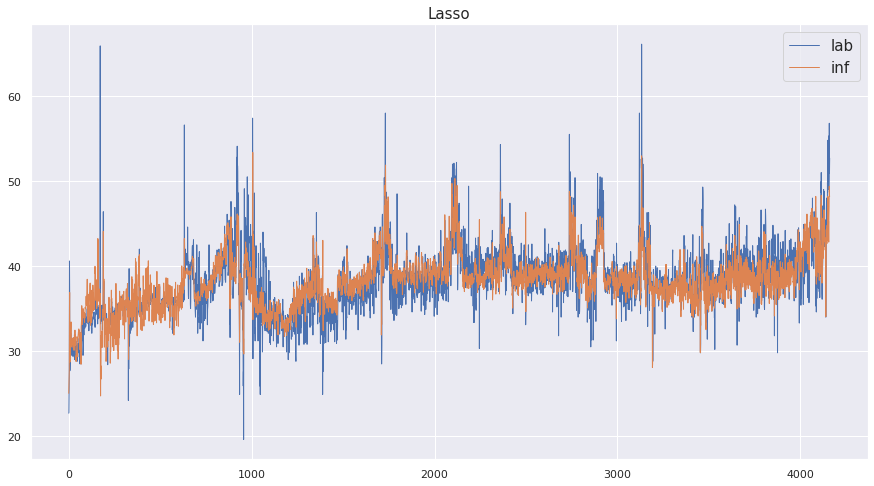

In [329]:
plt.figure(figsize = (15, 8))
plt.plot(np.arange(len(y)), y, lw = 1, label = 'lab')
plt.plot(np.arange(len(y)), inf, lw = 1, label = 'inf')
plt.title('Lasso', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# XGBRegressor

In [342]:
x_train, x_test, y_train, y_test = tts(x, y)

model = XGBRegressor()
model.fit(x_train, y_train)
inf = model.predict(x)
print(f'train R2: {model.score(x_train, y_train)}')
print(f'test R2: {model.score(x_test, y_test)}')
print(f'total R2: {model.score(x, y)}')
print(f'MAE: {MAE(y, inf)}')
print(f'MSE: {MSE(y, inf)}')
print(model.feature_importances_)

[08:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train R2: 0.772737652137005
test R2: 0.584126425892195
total R2: 0.7242853115215124
MAE: 1.381683843934
MSE: 4.16362545499797
[0.4884884  0.36671242 0.05295607 0.09184312]


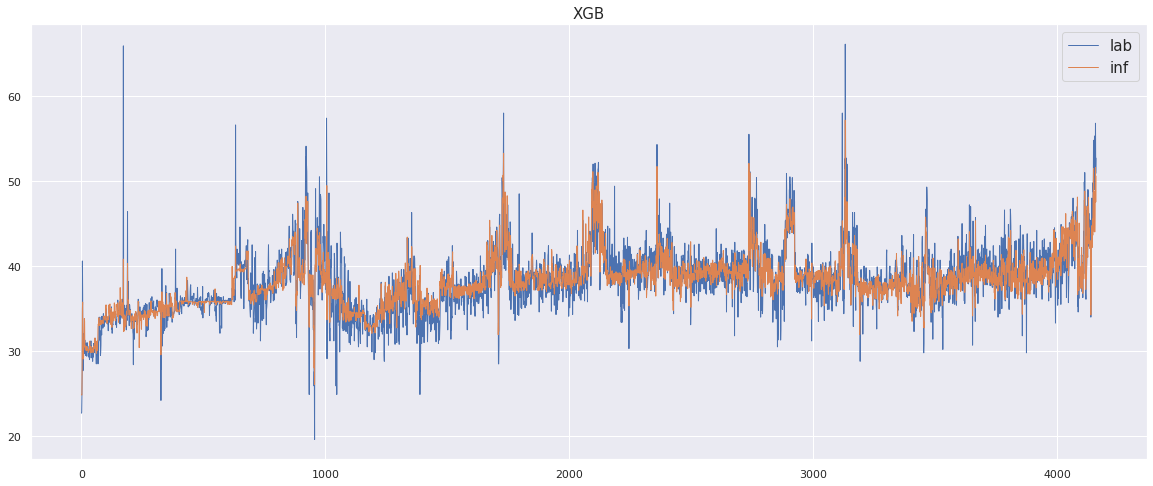

In [289]:
plt.figure(figsize = (20, 8))
plt.plot(np.arange(len(y)), y, lw = 1, label = 'lab')
plt.plot(np.arange(len(y)), inf, lw = 1, label = 'inf')
plt.title('XGB', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()